<a href="https://colab.research.google.com/github/SkovenForrest/Cellari_project/blob/Mask_RCNN/RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load data

In [ ]:
import torch
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import DataLoader, Dataset
import glob
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!ls drive/'My Drive'
!ls drive/'My Drive/Gland_dataset' &> /dev/null

images_path = 'drive/My Drive/Cellari_project/Gland_dataset/*'

In [ ]:
images = []
masks = []

# image preperation
train_images = glob.glob(images_path)
sorted_train_images = natsort.natsorted(train_images, reverse=False)


In [ ]:
for img in train_images:
    name_img = img.split("/")[-1].split(".")[0]
    imagg = name_img.split("_")[-1]
    if imagg == "anno":
        masks.append(img)
    else:
        images.append(img)

print(len(images))
print(len(masks))
#print(imagg)
print(images[:10])
print(masks[:10])

165
165
['drive/My Drive/Cellari_project/Gland_dataset/train_32.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/train_65.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/train_64.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/train_38.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/train_55.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/train_6.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/train_4.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/train_52.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/train_67.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/train_80.bmp']
['drive/My Drive/Cellari_project/Gland_dataset/testB_1_anno.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/testB_16_anno.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/testB_17_anno.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/testB_14_anno.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/testB_13_anno.bmp', 'drive/My Drive/Cellari_project/Gland_dataset/testB_1

In [ ]:
train_orig_images = []
train_masks = []

test_orig_images = []
test_masks = []

In [ ]:
for img in images:
    name_img = img.split("/")[-1].split(".")[0]
    imagg = name_img.split("_")[0]
    if imagg == "testA" or imagg == "testB":
        test_orig_images.append(img)
    else:
        train_orig_images.append(img)

for mask in masks:
    mask_img = mask.split("/")[-1].split(".")[0]
    imagg = mask_img.split("_")[0]
    if imagg == "testA" or imagg == "testB":
        test_masks.append(mask)
    else:
        train_masks.append(mask)


In [ ]:
print(len(train_orig_images), len(train_masks))
print(len(test_orig_images), len(test_masks))

85 85
80 80


In [ ]:
sorted_train_images = natsort.natsorted(train_orig_images, reverse=False)
sorted_train_masks = natsort.natsorted(train_masks, reverse=False)

sorted_test_images = natsort.natsorted(test_orig_images, reverse=False)
sorted_test_masks = natsort.natsorted(test_masks, reverse=False)

In [ ]:
#mean = (0.485, 0.456, 0.406)
#std = (0.229, 0.224, 0.225)
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.5, 0.5, 0.5])

transformations = transforms.Compose([transforms.Resize((512,512)) , transforms.ToTensor() , transforms.Normalize(mean, std)])



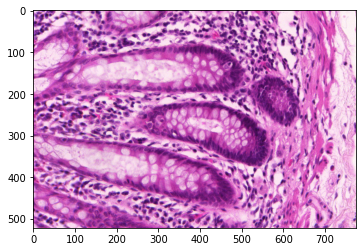

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(sorted_train_images[61]).convert("RGB")
plt.imshow(img)

In [ ]:
"""
import os
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
j=34

img = Image.open(sorted_test_images[j]).convert("RGB")
plt.imshow(img)
# note that we haven't converted the mask to RGB,
# because each color corresponds to a different instance
# with 0 being background
mask = Image.open(sorted_test_masks[j])
plt.imshow(mask)
mask = np.array(mask)

# instances are encoded as different colors
obj_ids = np.unique(mask)
# first id is the background, so remove it
obj_ids = obj_ids[1:]

# split the color-encoded mask into a set
# of binary masks
masks = mask == obj_ids[:, None, None]


# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(mask)
# get bounding box coordinates for each mask
num_objs = len(obj_ids)
boxes = []
class_to_remove = []
for i in range(num_objs):
    pos = np.where(masks[i])
    xmin = np.min(pos[1])
    xmax = np.max(pos[1])
    ymin = np.min(pos[0])
    ymax = np.max(pos[0])

    rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    if xmin != max and ymin != ymax:
      boxes.append([xmin, ymin, xmax, ymax])
    else :
      obj_ids = np.delete(obj_ids,i)

plt.show()
# convert everything into a torch.Tensor
boxes = torch.as_tensor(boxes, dtype=torch.float32)
# there is only one class
labels = torch.ones((num_objs,), dtype=torch.int64)
masks = torch.as_tensor(masks, dtype=torch.uint8)

image_id = torch.tensor([j])

target = {}
target["boxes"] = boxes
target["labels"] = labels
target["masks"] = masks
target["image_id"] = image_id

print("obj_ids",obj_ids)
print(boxes)
print("value at 201,311", mask[201,311])
"""

'\nimport os\nimport numpy as np\nimport torch\nfrom PIL import Image\nimport matplotlib.pyplot as plt\nfrom matplotlib.patches import Rectangle \nj=34\n\nimg = Image.open(sorted_test_images[j]).convert("RGB")\nplt.imshow(img)\n# note that we haven\'t converted the mask to RGB,\n# because each color corresponds to a different instance\n# with 0 being background\nmask = Image.open(sorted_test_masks[j])\nplt.imshow(mask)\nmask = np.array(mask)\n\n# instances are encoded as different colors\nobj_ids = np.unique(mask)\n# first id is the background, so remove it\nobj_ids = obj_ids[1:]\n\n# split the color-encoded mask into a set\n# of binary masks\nmasks = mask == obj_ids[:, None, None]\n\n\n# Create figure and axes\nfig,ax = plt.subplots(1)\n# Display the image\nax.imshow(mask)\n# get bounding box coordinates for each mask\nnum_objs = len(obj_ids)\nboxes = []\nclass_to_remove = []\nfor i in range(num_objs):\n    pos = np.where(masks[i])\n    xmin = np.min(pos[1])\n    xmax = np.max(pos[1])

In [ ]:
"""
for x in range(0,mask.shape[0]):
    for y in range(0, mask.shape[1]):
        if mask[x,y] == 6:
          print("coordinate", {x,y})
"""

'\nfor x in range(0,mask.shape[0]):\n    for y in range(0, mask.shape[1]):\n        if mask[x,y] == 6:\n          print("coordinate", {x,y})\n'

In [ ]:
import os
import numpy as np
import torch
from PIL import Image


class CellarDataset(object):
    def __init__(self, images, masks, transforms):
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = images
        self.masks = masks
        self.transforms = transforms

    def __getitem__(self, idx):
        #print("current idx =",idx)
        #print("len self.imgs =",len(self.imgs))
        img = Image.open(self.imgs[idx]).convert("RGB")
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = Image.open(self.masks[idx])
        
        mask = np.array(mask)
        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # split the color-encoded mask into a set
        # of binary masks
        masks = mask == obj_ids[:, None, None]

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            if xmax-xmin > 2 and ymax-ymin > 2 :
              boxes.append([xmin, ymin, xmax, ymax])
            else :
              obj_ids = np.delete(obj_ids,i)

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd
        #target["area"] = 1 
        #target["iscrowd"] = False 
        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

#Modifying the model from a pretrained RCNN

In [ ]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# load a pre-trained model for classification and return
# only the features
backbone = torchvision.models.mobilenet_v2(pretrained=True).features
# FasterRCNN needs to know the number of
# output channels in a backbone. For mobilenet_v2, it's 1280
# so we need to add it here
backbone.out_channels = 1280

# let's make the RPN generate 5 x 3 anchors per spatial
# location, with 5 different sizes and 3 different aspect
# ratios. We have a Tuple[Tuple[int]] because each feature
# map could potentially have different sizes and
# aspect ratios
anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))

# let's define what are the feature maps that we will
# use to perform the region of interest cropping, as well as
# the size of the crop after rescaling.
# if your backbone returns a Tensor, featmap_names is expected to
# be [0]. More generally, the backbone should return an
# OrderedDict[Tensor], and in featmap_names you can choose which
# feature maps to use.
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=["0"],
                                                output_size=7,
                                                sampling_ratio=2)
#roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=[0],
                                                #output_size=7,
                                                #sampling_ratio=2)

# put the pieces together inside a FasterRCNN model
model = FasterRCNN(backbone,
                   num_classes=2,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)



In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

      
def get_instance_segmentation_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)

    return model

In [ ]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.3.0

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

fatal: destination path 'vision' already exists and is not an empty directory.
HEAD is now at be37608 version check against PyTorch's CUDA version


In [ ]:
from engine import train_one_epoch, evaluate
import utils
import transforms as T


def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [ ]:
# use our dataset and defined transformations
dataset = CellarDataset(sorted_train_images,sorted_train_masks,get_transform(train=True))
dataset_test = CellarDataset(sorted_test_images,sorted_test_masks,get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices_train = torch.randperm(len(dataset)).tolist()
indices_test = torch.randperm(len(dataset_test)).tolist()
#dataset = torch.utils.data.Subset(dataset, indices[:-50])
#dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])
dataset = torch.utils.data.Subset(dataset, indices_train[:])
dataset_test = torch.utils.data.Subset(dataset_test, indices_test[:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=5, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)


print(indices_train)
print(len(dataset))

[70, 60, 72, 5, 83, 78, 33, 48, 8, 9, 6, 44, 3, 84, 26, 55, 37, 74, 14, 71, 25, 58, 75, 39, 68, 61, 18, 57, 66, 4, 21, 69, 32, 11, 29, 30, 40, 67, 22, 43, 15, 82, 51, 54, 63, 50, 0, 46, 81, 53, 79, 2, 56, 77, 59, 24, 76, 23, 20, 35, 7, 36, 65, 62, 73, 12, 28, 42, 10, 49, 17, 27, 13, 38, 80, 34, 19, 47, 64, 52, 1, 31, 16, 41, 45]
85


In [ ]:
"""
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2

# put the pieces together inside a FasterRCNN model
model = FasterRCNN(backbone,
                   num_classes=2,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)
"""

"\ndevice = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')\n\n# our dataset has two classes only - background and person\nnum_classes = 2\n\n# put the pieces together inside a FasterRCNN model\nmodel = FasterRCNN(backbone,\n                   num_classes=2,\n                   rpn_anchor_generator=anchor_generator,\n                   box_roi_pool=roi_pooler)\n# move model to the right device\nmodel.to(device)\n\n# construct an optimizer\nparams = [p for p in model.parameters() if p.requires_grad]\noptimizer = torch.optim.SGD(params, lr=0.005,\n                            momentum=0.9, weight_decay=0.0005)\n\n# and a learning rate scheduler which decreases the learning rate by\n# 10x every 3 epochs\nlr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,\n                                               step_size=3,\n                                               gamma=0.1)\n"

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2

# get the model using our helper function
model = get_instance_segmentation_model(num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


In [ ]:
# let's train it for 10 epochs
num_epochs = 10

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


Epoch: [0]  [ 0/17]  eta: 0:01:46  lr: 0.000317  loss: 3.7607 (3.7607)  loss_classifier: 0.5479 (0.5479)  loss_box_reg: 0.5134 (0.5134)  loss_mask: 2.0989 (2.0989)  loss_objectness: 0.5256 (0.5256)  loss_rpn_box_reg: 0.0749 (0.0749)  time: 6.2377  data: 4.4319  max mem: 5527
Epoch: [0]  [10/17]  eta: 0:00:13  lr: 0.003439  loss: 2.0465 (2.4945)  loss_classifier: 0.4373 (0.4621)  loss_box_reg: 0.5807 (0.6147)  loss_mask: 0.8150 (1.0830)  loss_objectness: 0.1748 (0.2675)  loss_rpn_box_reg: 0.0678 (0.0671)  time: 1.9859  data: 0.4283  max mem: 6353
Epoch: [0]  [16/17]  eta: 0:00:01  lr: 0.005000  loss: 1.8511 (2.1727)  loss_classifier: 0.4120 (0.4212)  loss_box_reg: 0.5807 (0.5981)  loss_mask: 0.6004 (0.8822)  loss_objectness: 0.1503 (0.2050)  loss_rpn_box_reg: 0.0678 (0.0662)  time: 1.8258  data: 0.2856  max mem: 6353
Epoch: [0] Total time: 0:00:31 (1.8313 s / it)
creating index...
index created!
Test:  [ 0/80]  eta: 0:01:01  model_time: 0.4101 (0.4101)  evaluator_time: 0.1179 (0.1179)  

In [ ]:
print(dataset_test)

In [ ]:
# pick one image from the test set
img, _ = dataset_test[0]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

In [ ]:
prediction

[{'boxes': tensor([[2.3837e+00, 5.9190e+01, 7.1924e+01, 1.4705e+02],
          [1.5996e+00, 1.7920e+02, 2.8400e+02, 4.4200e+02],
          [4.2526e+00, 4.2503e-01, 8.4067e+01, 4.8233e+01],
          [4.5467e+02, 6.3472e+00, 5.7831e+02, 2.1710e+02],
          [1.2688e+02, 2.8639e+00, 4.6748e+02, 1.7599e+02],
          [4.8187e+02, 1.4399e+02, 5.7655e+02, 3.2760e+02],
          [3.7429e+02, 2.2191e+02, 5.3533e+02, 3.7948e+02],
          [4.1234e+02, 9.5437e+00, 5.8100e+02, 3.4683e+02],
          [8.1381e-01, 1.8705e+00, 8.4007e+01, 9.4124e+01],
          [1.2892e+02, 2.8514e+02, 2.5242e+02, 4.3627e+02],
          [3.6443e+02, 1.0428e+02, 5.7685e+02, 4.1214e+02],
          [2.5253e+02, 1.2291e+01, 5.8098e+02, 3.7479e+02],
          [0.0000e+00, 1.7227e+02, 2.2280e+02, 3.4136e+02],
          [0.0000e+00, 6.8993e+00, 1.2880e+02, 1.5496e+02],
          [4.8422e+02, 2.0353e+02, 5.5851e+02, 3.2031e+02],
          [4.7465e+02, 3.9889e+02, 5.7656e+02, 4.3891e+02],
          [3.4014e+02, 1.5736e+

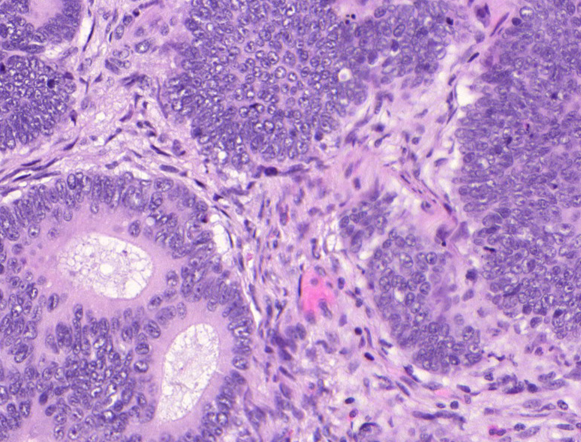

In [ ]:
Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())

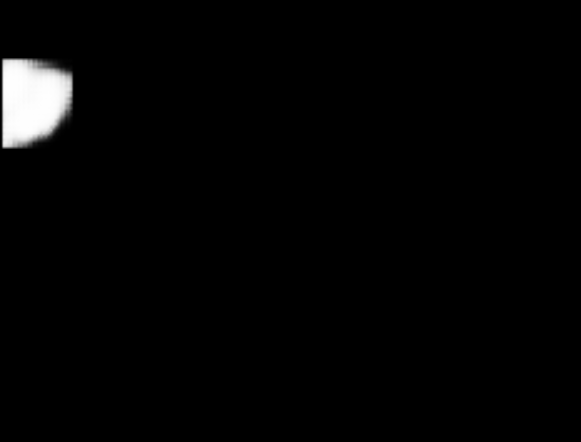

In [ ]:
Image.fromarray(prediction[0]['masks'][0, 0].mul(255).byte().cpu().numpy())

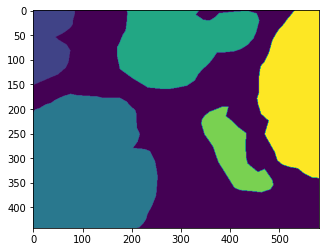

In [ ]:
img2 = dataset_test.dataset.masks[15]
img2 = Image.open(img2)
plt.imshow(img2)


In [ ]:
img3 = sorted_test_imgs[15]
print(img3)
img3 = Image.open(img3)
plt.imshow(img3)

NameError: ignored